<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Axel Cabrera Jaramillo, Ricardo Damián Hernández Ramírez

**Fecha:** 13 feb 2024

**Expediente** : 730793, 740356
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**:[Link con el enlace del repositorio del creador del proyecto](https://github.com/jaramillooo/T3_AECabrera.git)

# Tarea 3

# <font color= Red>

Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado. Algo como lo siguiente:

```python
class LinearForecast:
    def __init__(self, atributos_del_contructor):
        
    def adf_test(self):
        
    def plot_acf_pac(self):
        
        .
        .
        .
````

Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase.

Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos:
https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true

Código de solución estudiante 1

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución estudiante 2 - Ricardo Damián Hernández Ramírez


In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import MSTL
import itertools
from sklearn.preprocessing import power_transform
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Código de solución estudiante 2
class LinearForecast:
    def __init__(self, data):
        self.data = data

    def adf_test(self):
        print("Results of Dickey-Fuller Test:")
        dftest = adfuller(self.data, autolag="AIC")
        dfoutput = pd.Series(
            dftest[0:4],
            index=[
                "Test Statistic",
                "p-value",
                "#Lags Used",
                "Number of Observations Used",
            ],
        )
        for key, value in dftest[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)

        if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
            print("\u001b[32mStationary\u001b[0m")
        else:
            print("\x1b[31mNon-stationary\x1b[0m")

        # Graficar ACF y PACF
    def plot_acf_pacf(self, kwargs=dict()):
        f = plt.figure(figsize=(8,5))

        ax1 = f.add_subplot(121)

        plot_acf(self.data, zero=False, ax=ax1, **kwargs)

        ax2 = f.add_subplot(122)
        plot_pacf(self.data, zero=False, ax=ax2, method='ols', **kwargs)

        plt.show()

    def descomposicion(self):
        data1 = self.data.copy()
        periods_seasonality = (6, 12)

        stl_kwargs = {"seasonal_deg": 0}
        model = MSTL(data1, periods=periods_seasonality, stl_kwargs=stl_kwargs)
        res2 = model.fit()

        # Gráfica de descomposición
        fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))

        res2.observed.plot(ax=ax[0])
        ax[0].set_ylabel('Observed')

        res2.trend.plot(ax=ax[1])
        ax[1].set_ylabel('Trend')

        res2.seasonal[f'seasonal_{periods_seasonality[0]}'].plot(ax=ax[2])
        ax[2].set_ylabel(f'seasonal_{periods_seasonality[0]}')

        res2.seasonal[f'seasonal_{periods_seasonality[1]}'].plot(ax=ax[3])
        ax[3].set_ylabel(f'seasonal_{periods_seasonality[1]}')

        res2.resid.plot(ax=ax[4])
        ax[4].set_ylabel('Residual')

        fig.tight_layout()

        return res2
    #Combinaciones de parametros
    def sarimaxParameters(self, p, d, q, P, D, Q, chosenSeasonality, t=['n', 'c', 't', 'ct']):

        params_no_estacionales = list(itertools.product(p, d, q))
        params_estacionales = [(x[0], x[1], x[2], chosenSeasonality) for x in list(itertools.product(P, D, Q))]

        # Diferentes combinaciones
        sarimax_params = list(itertools.product(params_no_estacionales, params_estacionales, t))
        self.sarimax_params = sarimax_params

    def findParams(self):

        resultados = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'], index=np.arange(0, 11))

        print(f'Trying out {len(self.sarimax_params)} posible combinations')

        i = 0
        for par_no_season, par_season, trend in self.sarimax_params:

            mod = SARIMAX(
                endog=self.data,
                trend=trend,
                order=par_no_season,
                seasonal_order=par_season
            )
            results = mod.fit()

            print(f'Model done for params: {par_no_season}, {par_season}, {trend}')

            resultados.loc[i, 'params'] = str((par_no_season, par_season, trend))
            resultados.loc[i, 'AIC'] = results.aic
            resultados.loc[i, 'BIC'] = results.bic
            resultados.loc[i, 'LLF'] = results.llf
            i += 1

        self.resultadosParams = resultados
        return self.resultadosParams
    def sarimax_model(self, order, seasonal_order):
        '''Creates a SARIMAX model with specified order and seasonal_order'''
        model = SARIMAX(self.data, order=order, seasonal_order=seasonal_order)
        return model


    #MAPE
    def calculate_mape(self):

        if not all([isinstance(self.actual, np.ndarray), isinstance(self.predicted, np.ndarray)]):
            self.actual, self.predicted = np.array(self.actual), np.array(self.predicted)

        self.mape =  round(np.mean(np.abs((self.actual - self.predicted) / self.actual)) * 100, 2)

    #MAD
    def calculate_mad(self):

        if not all([isinstance(self.actual, np.ndarray), isinstance(self.predicted, np.ndarray)]):
            self.actual, self.predicted = np.array(self.actual), np.array(self.predicted)

        self.mad =  round(np.mean(np.abs(self.actual - self.predicted)) * 100, 2)

    def errors(self):

        self.calculate_mape()
        self.calculate_mad()
        print(f'MAPE: {self.mape} \n MAD: {self.mad}')


In [3]:
url = 'https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true'
data = pd.read_excel(url)
data

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.632
1,7,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.409
2,8,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.154
3,9,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.273
4,10,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.230
...,...,...,...,...,...,...,...,...,...,...,...,...
96995,8750,2014-12-31,2014,Dec,Wed,14,903,971,94,14.4875,8.8,925.713
96996,8751,2014-12-31,2014,Dec,Wed,15,746,950,76,14.2563,8.8,920.625
96997,8752,2014-12-31,2014,Dec,Wed,16,545,865,69,13.2500,8.6,854.471
96998,8753,2014-12-31,2014,Dec,Wed,17,308,599,80,13.0094,9.0,605.375


In [4]:
data = data[['date', 'Energy (kWh)']]
data.columns = ['date', 'y']


# Hacer un re muestreo de los datos para que queden de forma mensual (promediarlos)
data = data.set_index('date').resample('M').mean()
data.head()

,y
date,
1990-01-31,451.887005
1990-02-28,423.897505
1990-03-31,430.298776
1990-04-30,296.197605
1990-05-31,288.352006


<Axes: xlabel='date'>

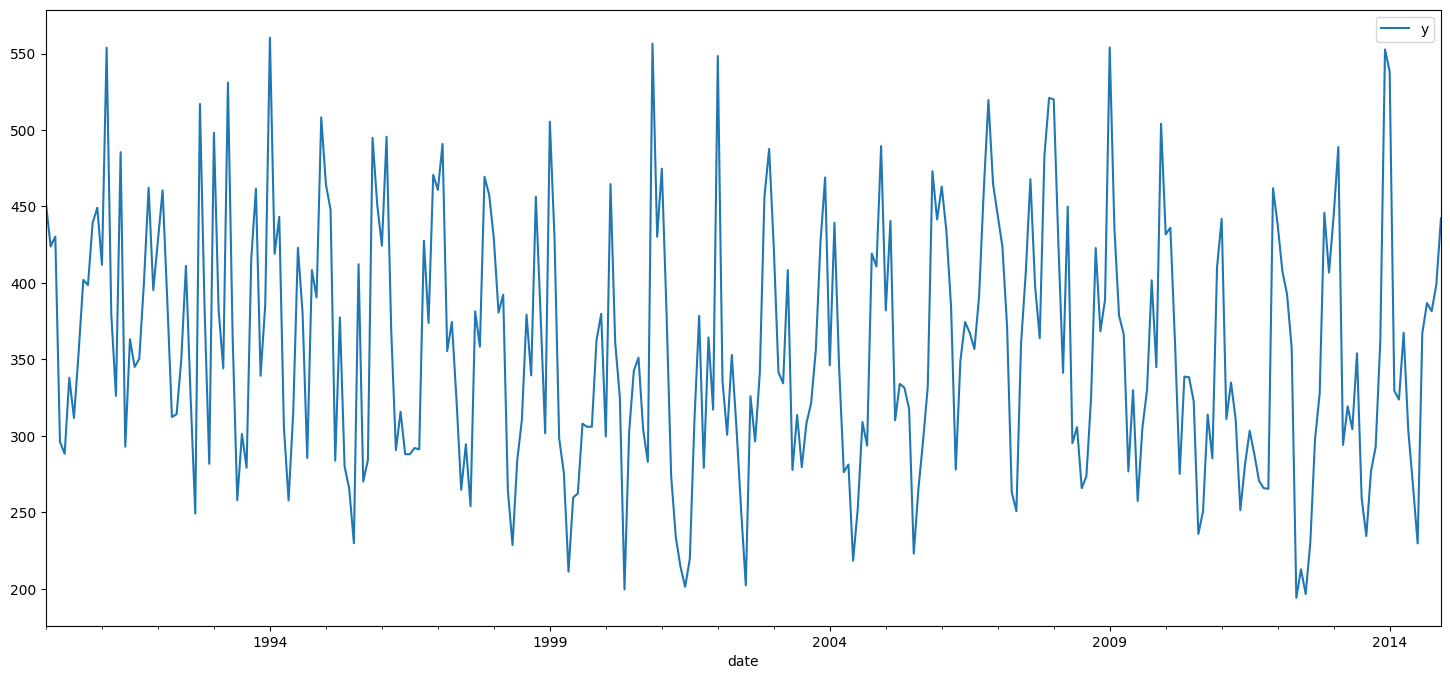

In [5]:
data.plot(figsize=(18,8))

In [14]:
model = LinearForecast(data)


In [15]:
LinearForecast(data).adf_test()


Results of Dickey-Fuller Test:
Test Statistic                  -2.242267
p-value                          0.191264
#Lags Used                      13.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64
Non-stationary


Podemos observar que la serie no es estacionaria, por lo que habrá que diferenciar.

In [16]:
LinearForecast(data.diff().dropna()).adf_test()


Results of Dickey-Fuller Test:
Test Statistic                -1.185352e+01
p-value                        7.115964e-22
#Lags Used                     1.200000e+01
Number of Observations Used    2.860000e+02
Critical Value (1%)           -3.453423e+00
Critical Value (5%)           -2.871699e+00
Critical Value (10%)          -2.572183e+00
dtype: float64
Stationary


Al hacer una diferenciacion la serie de tiempo se hace estacionaria.

## Descomposición

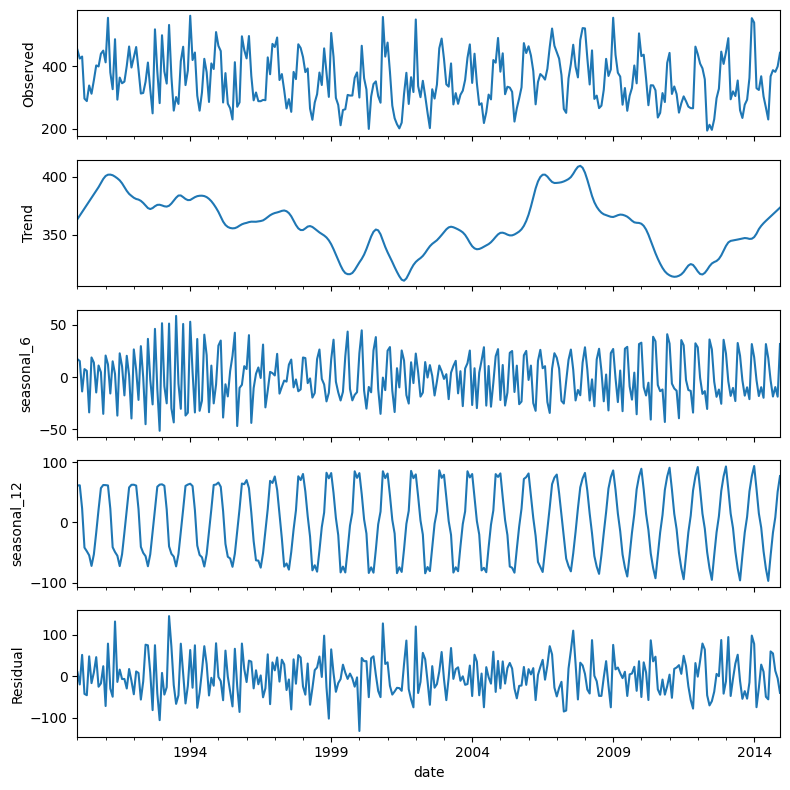

In [17]:
res = LinearForecast(data).descomposicion()
res

<Axes: xlabel='date'>

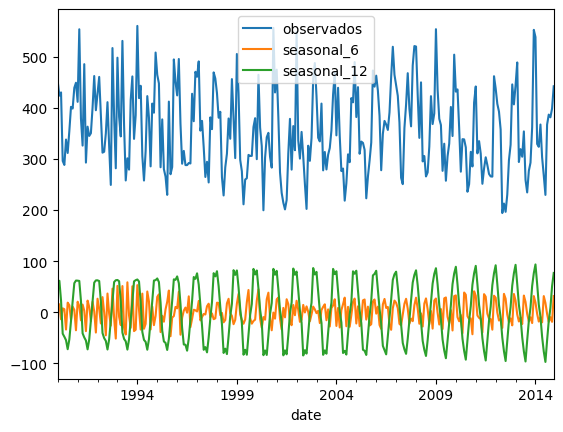

In [18]:
ax = res.observed.to_frame('observados').plot()
res.seasonal.plot(ax=ax)

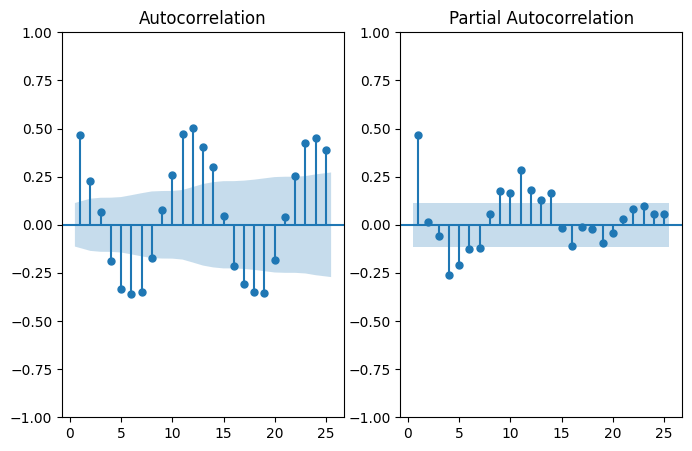

In [19]:
LinearForecast(data).plot_acf_pacf()


Podemos observar un patrón cada 6 y 12 meses.

In [20]:
seasonality_6 = res.seasonal['seasonal_6']
LinearForecast(seasonality_6).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                -9.451841e+00
p-value                        4.594080e-16
#Lags Used                     1.600000e+01
Number of Observations Used    2.830000e+02
Critical Value (1%)           -3.453670e+00
Critical Value (5%)           -2.871808e+00
Critical Value (10%)          -2.572241e+00
dtype: float64
Stationary


In [21]:
seasonality_12 = res.seasonal['seasonal_12']
LinearForecast(seasonality_12).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                 -29.256349
p-value                          0.000000
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64
Stationary


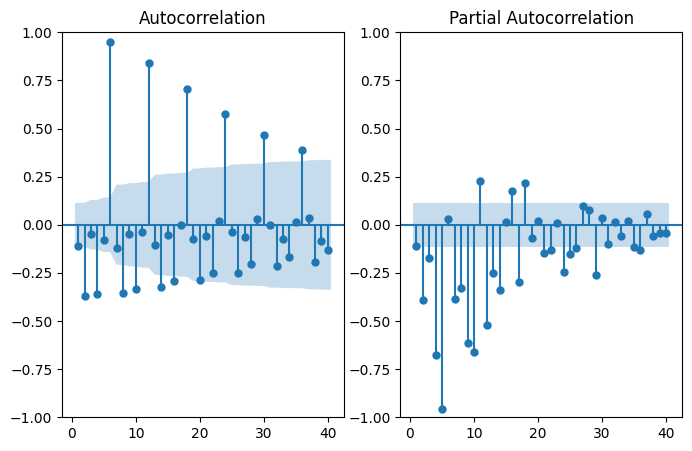

In [22]:
LinearForecast(seasonality_6).plot_acf_pacf({'lags': 40})


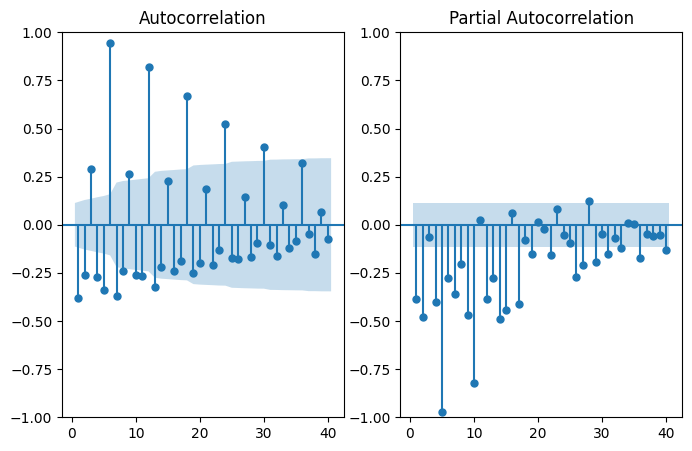

In [23]:
LinearForecast(seasonality_6.diff().dropna()).plot_acf_pacf({'lags': 40})


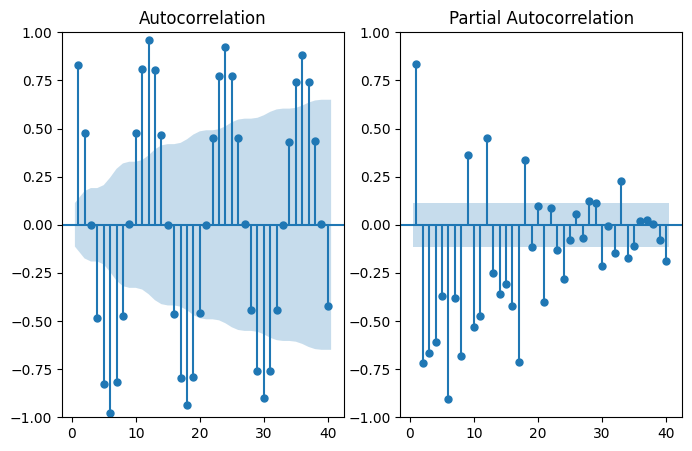

In [24]:
LinearForecast(seasonality_12).plot_acf_pacf({'lags': 40})


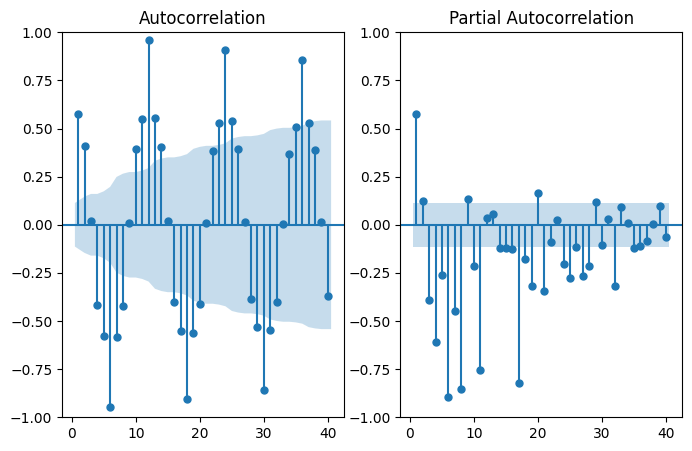

In [25]:
LinearForecast(seasonality_12.diff().dropna()).plot_acf_pacf({'lags': 40})


Observamos que el componente no estacional no es estacionario, por lo que lo tendremos que diferenciar.

In [26]:
LinearForecast(res.observed).adf_test()


Results of Dickey-Fuller Test:
Test Statistic                  -2.242267
p-value                          0.191264
#Lags Used                      13.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64
Non-stationary


<Axes: xlabel='date'>

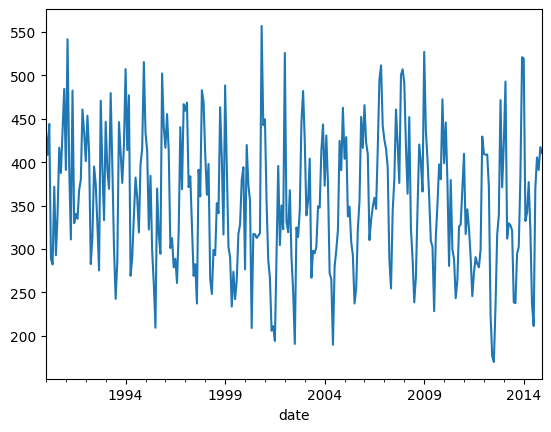

In [27]:
# Calcular la componente no estacional de la serie temporal
non_seasonal = res.observed - res.seasonal['seasonal_6']
non_seasonal.plot()

In [28]:
# Calcular si la serie no estacional es estacionaria
LinearForecast(non_seasonal).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                  -2.287739
p-value                          0.175953
#Lags Used                      15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64
Non-stationary


In [29]:
LinearForecast(non_seasonal.diff().dropna()).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                  -5.001408
p-value                          0.000022
#Lags Used                      16.000000
Number of Observations Used    282.000000
Critical Value (1%)             -3.453754
Critical Value (5%)             -2.871844
Critical Value (10%)            -2.572261
dtype: float64
Stationary


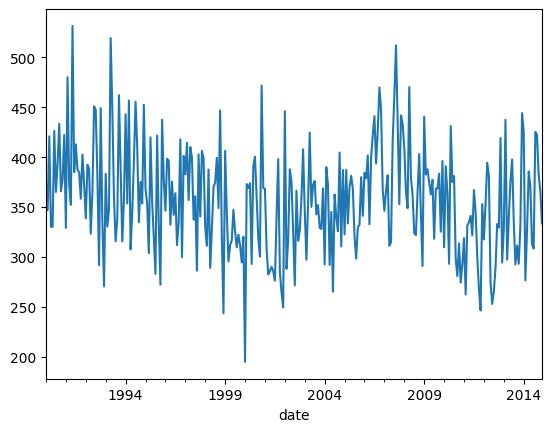

In [30]:
non_seasonal2 = res.observed - res.seasonal['seasonal_6'] - res.seasonal['seasonal_12']
ax = non_seasonal2.plot()
plt.show()

In [31]:
# Calcular si la serie no estacional es estacionaria o no
LinearForecast(non_seasonal2).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                  -2.652388
p-value                          0.082646
#Lags Used                      13.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64
Non-stationary


In [32]:
LinearForecast(non_seasonal2.diff().dropna()).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                -7.982167e+00
p-value                        2.605812e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.850000e+02
Critical Value (1%)           -3.453505e+00
Critical Value (5%)           -2.871735e+00
Critical Value (10%)          -2.572202e+00
dtype: float64
Stationary


La serie se vuelve estacionaria después de diferenciarla una vez, por eso se usará d=1. Ahora seleccionaré los valores de p y q.

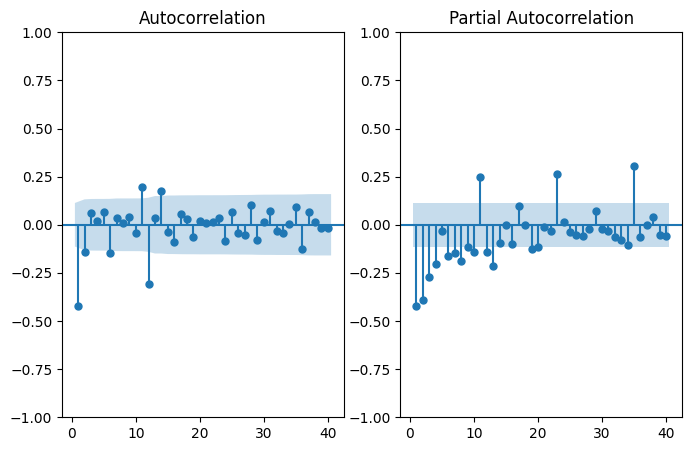

In [33]:
LinearForecast((non_seasonal2.diff().dropna())).plot_acf_pacf({'lags': 40})

$$ p = 0-2$$, $$q = 0-2$$

In [34]:
p = [0, 1, 2]
d = [1]
q = [0, 1]
P = [0, 1]
D = [0]
Q = [0, 1]
# Crear una instancia de la clase LinearForecast
forecast = LinearForecast(data)

# Usar el método sarimaxParameters
forecast.sarimaxParameters(p, d, q, P, D, Q, 6)

In [35]:
posibleParams = forecast.findParams().sort_values(by=['AIC'], ascending=True)
posibleParams

Trying out 96 posible combinations
Model done for params: (0, 1, 0), (0, 0, 0, 6), n
Model done for params: (0, 1, 0), (0, 0, 0, 6), c
Model done for params: (0, 1, 0), (0, 0, 0, 6), t
Model done for params: (0, 1, 0), (0, 0, 0, 6), ct
Model done for params: (0, 1, 0), (0, 0, 1, 6), n
Model done for params: (0, 1, 0), (0, 0, 1, 6), c
Model done for params: (0, 1, 0), (0, 0, 1, 6), t
Model done for params: (0, 1, 0), (0, 0, 1, 6), ct
Model done for params: (0, 1, 0), (1, 0, 0, 6), n
Model done for params: (0, 1, 0), (1, 0, 0, 6), c
Model done for params: (0, 1, 0), (1, 0, 0, 6), t
Model done for params: (0, 1, 0), (1, 0, 0, 6), ct
Model done for params: (0, 1, 0), (1, 0, 1, 6), n
Model done for params: (0, 1, 0), (1, 0, 1, 6), c
Model done for params: (0, 1, 0), (1, 0, 1, 6), t
Model done for params: (0, 1, 0), (1, 0, 1, 6), ct
Model done for params: (0, 1, 1), (0, 0, 0, 6), n
Model done for params: (0, 1, 1), (0, 0, 0, 6), c
Model done for params: (0, 1, 1), (0, 0, 0, 6), t
Model done 

,params,AIC,BIC,LLF
92,"((2, 1, 1), (1, 0, 1, 6), 'n')",3323.737323,3345.939985,-1655.868662
28,"((0, 1, 1), (1, 0, 1, 6), 'n')",3324.069921,3338.871695,-1658.03496
93,"((2, 1, 1), (1, 0, 1, 6), 'c')",3325.534425,3351.43753,-1655.767213
94,"((2, 1, 1), (1, 0, 1, 6), 't')",3326.116449,3352.019554,-1656.058225
61,"((1, 1, 1), (1, 0, 1, 6), 'c')",3333.585554,3355.788216,-1660.792777
...,...,...,...,...
6,"((0, 1, 0), (0, 0, 1, 6), 't')",3507.274605,3518.375936,-1750.637303
5,"((0, 1, 0), (0, 0, 1, 6), 'c')",3507.284056,3518.385387,-1750.642028
3,"((0, 1, 0), (0, 0, 0, 6), 'ct')",3507.474469,3518.575799,-1750.737234
11,"((0, 1, 0), (1, 0, 0, 6), 'ct')",3509.18336,3523.985134,-1750.59168


In [36]:
order = (2, 1, 1)
seasonal_order = (1, 0, 1, 6)

# Crear una instancia de la clase LinearForecast
forecast = LinearForecast(data)  # 'data' es tu serie de tiempo

# Llamar a la función sarimax_model en la instancia de la clase LinearForecast
model = forecast.sarimax_model(order, seasonal_order)

# Ajustar el modelo a tus datos
results = model.fit()

# Ver un resumen del modelo ajustado
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  300
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 6)   Log Likelihood               -1655.869
Date:                           Thu, 15 Feb 2024   AIC                           3323.737
Time:                                   19:17:10   BIC                           3345.940
Sample:                               01-31-1990   HQIC                          3332.624
                                    - 12-31-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0441      0.067      0.654      0.513      -0.088       0.176
ar.L2         -0.1235      0.064     -1.939

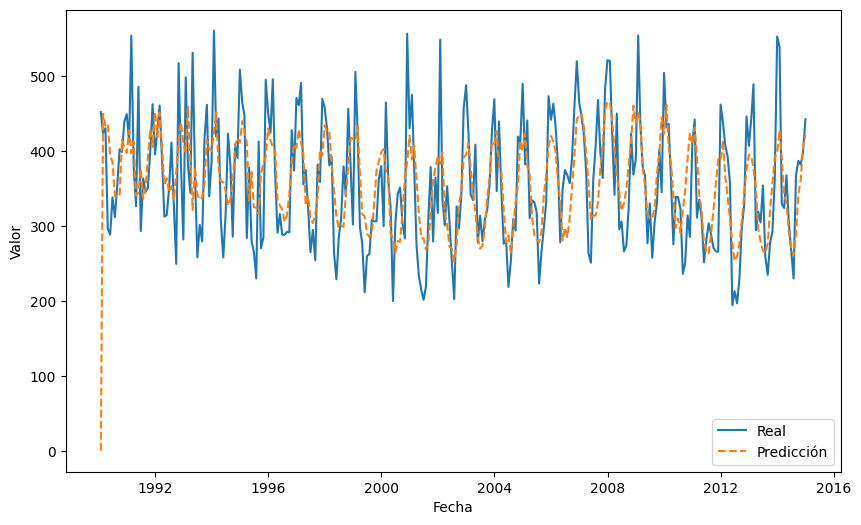

In [37]:

# Obtener las predicciones del modelo ajustado
predictions = results.predict()

# Graficar la serie de tiempo real y la serie de tiempo predicha
plt.figure(figsize=(10, 6))
plt.plot(data, label='Real')
plt.plot(predictions, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()